# The Spark Foundation Internship - Task5

## Exploratory Data Analysis

Objective:

  -To understand how the company is performing and identify the weak areas.

  -To identify the potential customers and increase revenue.

  -Suggestions to thrive business- Offering discounts, improving the customer experience, offering vide variety of products and fast delivery. 


__author__ = "Manasa Nallavelli"

__email__ = "manasa2093@gmail.com"


In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#reading data in pandas dataframe
path = "/Users/sai/Desktop/Business Analytics/Sparks foundation /task5/SampleSuperstore.csv"
df = pd.read_csv(path)

In [3]:
#top 3 rows of dataset
df.head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
#checking for null values in df
for i in df:
    print(i)
    print( pd.isnull(df[i]).value_counts())

Ship Mode
False    9994
Name: Ship Mode, dtype: int64
Segment
False    9994
Name: Segment, dtype: int64
Country
False    9994
Name: Country, dtype: int64
City
False    9994
Name: City, dtype: int64
State
False    9994
Name: State, dtype: int64
Postal Code
False    9994
Name: Postal Code, dtype: int64
Region
False    9994
Name: Region, dtype: int64
Category
False    9994
Name: Category, dtype: int64
Sub-Category
False    9994
Name: Sub-Category, dtype: int64
Sales
False    9994
Name: Sales, dtype: int64
Quantity
False    9994
Name: Quantity, dtype: int64
Discount
False    9994
Name: Discount, dtype: int64
Profit
False    9994
Name: Profit, dtype: int64


There are no null and missing values, data is ready for analysis.

In [11]:
#Dropping postal code 
df=df.drop(['Postal Code'],axis=1)

In [12]:
df.head(3)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.62,2,0.0,6.8714


,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


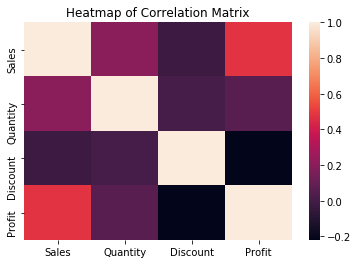

In [13]:
#correlation matrix - relationship of numeric variables with price
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

Sales and profit - It is observed that , there is slight positive linear relationship between the sales and profit but the relationship is weak.

Discount and profit seems to have negative relationship.

it is difficut to ascertain how each of these variables are related with Profit, Lets try scatter plots and examine the relationships. 




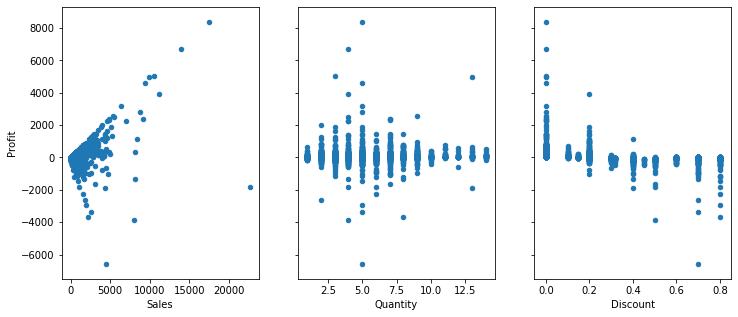

In [14]:
# visualize the relationship between the numeric variables and profit using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='Sales', y='Profit', ax=axs[0], figsize=(12, 5))
df.plot(kind='scatter', x='Quantity', y='Profit', ax=axs[1])
df.plot(kind='scatter', x='Discount', y='Profit', ax=axs[2])

The profits of the company goes from negative to positive. 
It is observed that, As the discount increases ,the profit goes down. 



In [17]:
#We will examine which segment has more profits 
Segment_profit= df['Profit'].groupby(df['Segment']).sum()
Segment_profit

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64

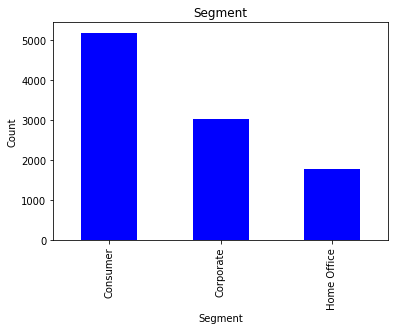

In [75]:
#Visualize which Segment has highest count
df['Segment'].value_counts().plot(kind='bar',color = 'b')
plt.title("Segment")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.show()

It is observed that, Consumer has highest count, and comaparing it with profit - consumer has highest profits. 

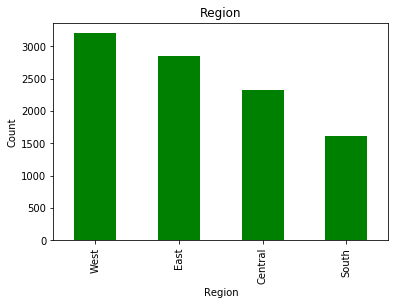

In [77]:
#Lets visualize which Region is highest
df['Region'].value_counts().plot(kind='bar',color = 'g')
plt.title("Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

In [79]:
#Region wise profits
Region_profit= df['Profit'].groupby(df['Region']).sum()
Region_profit

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

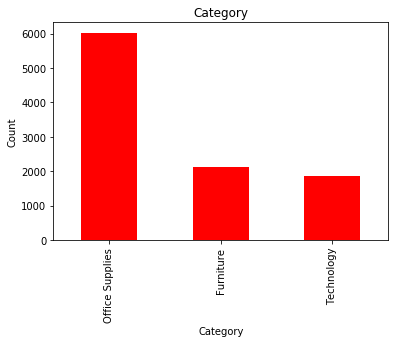

In [88]:
#Lets visualize which Region is highest
df['Category'].value_counts().plot(kind='bar',color = 'r')
plt.title("Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [81]:
#Region wise profits
Category_profit= df['Profit'].groupby(df['Category']).sum()
Category_profit

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

Surprisingly, Office supplies has more count but yeilds less profit. But Technology category has high profit margin.   Hence targetting customers in this category can increase the chance of higher sales and profits.Lets further examine which sub category of techonology yeild high profit. 

In [82]:
#Filtering rows where category = technology
df_tech =  df['Category']=="Technology"
df_tech = df[df_tech]

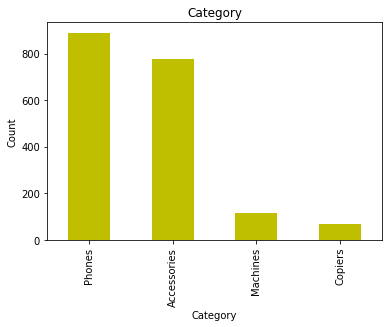

In [84]:
#V
df_tech['Sub-Category'].value_counts().plot(kind='bar',color = 'y')
plt.title("Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [86]:
subCategory_profit= df_tech['Profit'].groupby(df_tech['Sub-Category']).sum()
subCategory_profit

Sub-Category
Accessories    41936.6357
Copiers        55617.8249
Machines        3384.7569
Phones         44515.7306
Name: Profit, dtype: float64

Almost all Sub categories in technology have high profits. Major contribution is from Accessories, Copiers and Phones. 

In [87]:
#Finding the top 15 states which have high profits
top_15 =df['Profit'].groupby(df['State']).sum().sort_values(ascending=False)
top_15.head(15)

State
California       76381.3871
New York         74038.5486
Washington       33402.6517
Michigan         24463.1876
Virginia         18597.9504
Indiana          18382.9363
Georgia          16250.0433
Kentucky         11199.6966
Minnesota        10823.1874
Delaware          9977.3748
New Jersey        9772.9138
Wisconsin         8401.8004
Rhode Island      7285.6293
Maryland          7031.1788
Massachusetts     6785.5016
Name: Profit, dtype: float64

California, New york are the states with highest profit. Targetting these states will yeild high profits.

In [68]:
# Check which ship mode contributes more profit-
Shipmode_profit =df['Profit'].groupby(df['Ship Mode']).sum().sort_values(ascending=False)
Shipmode_profit

Ship Mode
Standard Class    164088.7875
Second Class       57446.6354
First Class        48969.8399
Same Day           15891.7589
Name: Profit, dtype: float64

Now that we have examined all variables, the key insights are as follows - 

1. Ship mode - standard class - contribute high profits
2. In segment - Consumer segment yeild almost double profit of Home offices. 
3. Region - Major profits are from West and East regions.
3. Category - Technology and Office supplies yeild high  profits.
4. Targetting customers in the top 10 states which have high profit margin has substantial chances of increasing the revenue. 

# Conclusion:

##### If we focus on the "target customers" in the respective categories/segments mentioned above, there are good chances of increasing the revenue. Also, some suggestions to attract customers include - Offering good discounts, improving the customer experience, offering vide variety of products and fast delivery. So far, our analysis was good but we can further improve by analyzing the "potential customers" and conducting RFM analysis if we have additional data. 